In [2]:
import sympy as smp

# Defino los símbolos y las coordenadas

## Símbolos y funciones

In [3]:
t, g, m1, m2, l = smp.symbols('t g m1 m2 l')
x1, the = smp.symbols(r'x_1 \theta', cls=smp.Function)
x1 = x1(t)
the = the(t)

In [4]:
x1_t = smp.diff(x1,t)
the_t = smp.diff(the,t)
x1_tt = smp.diff(x1_t,t)
the_tt = smp.diff(the_t,t)

## Coordenadas y transformación

In [5]:
xm1 = x1
ym1 = 0
xm2 = xm1 + l*smp.sin(the)
ym2 = - l*smp.cos(the)

# Energías y Lagrangianos

In [6]:
# Energías cinéticas
T1 = smp.Rational(1,2) * m1 * x1_t**2
T2 = smp.Rational(1,2) * m2 * (smp.diff(xm2,t)**2 + smp.diff(ym2,t)**2)

# Energías potenciales
U1 = m1*g*ym1
U2 = m2*g*ym2

# Lagrangiano
L = T1 + T2 - U1 - U2

In [7]:
L.simplify()

g*l*m2*cos(\theta(t)) + m1*Derivative(x_1(t), t)**2/2 + m2*(l**2*Derivative(\theta(t), t)**2 + 2*l*cos(\theta(t))*Derivative(\theta(t), t)*Derivative(x_1(t), t) + Derivative(x_1(t), t)**2)/2

## Ecuaciones de E+L

In [8]:
EL_the = smp.diff(smp.diff(L,the_t),t) - smp.diff(L, the)
EL_x1 = smp.diff(smp.diff(L,x1_t),t) - smp.diff(L, x1)

In [9]:
EL_the.simplify()

l*m2*(g*sin(\theta(t)) + l*Derivative(\theta(t), (t, 2)) + cos(\theta(t))*Derivative(x_1(t), (t, 2)))

In [10]:
EL_x1.simplify()

m1*Derivative(x_1(t), (t, 2)) + m2*(-l*sin(\theta(t))*Derivative(\theta(t), t)**2 + l*cos(\theta(t))*Derivative(\theta(t), (t, 2)) + Derivative(x_1(t), (t, 2)))

In [11]:
ans = smp.solve([EL_the, EL_x1], (the_tt, x1_tt))

In [12]:
ans[the_tt]

-(g*(m1 + m2) + l*m2*cos(\theta(t))*Derivative(\theta(t), t)**2)*sin(\theta(t))/(l*(m1 + m2*sin(\theta(t))**2))

In [13]:
ans[x1_tt]

m2*(g*cos(\theta(t)) + l*Derivative(\theta(t), t)**2)*sin(\theta(t))/(m1 + m2*sin(\theta(t))**2)

Entonces el sistema a resolver nos quedó esto:
$$
\ddot \theta(t) = - \left[\frac{g(m_1 + m_2) + lm_2 \cos(\theta) \dot\theta^2}{l (m_1 +m_2 \sin^2(\theta))}\right]\sin(\theta)
$$

$$
\ddot x_1(t) = m_2 \left[\frac{g\cos(\theta) + l \dot\theta^2}{m_1 +m_2 \sin^2(\theta)}\right]\sin(\theta)
$$

# Resolviendo el sistema de ecuaciones

In [14]:
dvdt_f = smp.lambdify((t,g,m1,m2,l,x1,the,x1_t,the_t), ans[x1_tt])
dwdt_f = smp.lambdify((t,g,m1,m2,l,x1,the,x1_t,the_t), ans[the_tt])
dx1dt_f = smp.lambdify(x1_t, x1_t)
dthedt_f = smp.lambdify(the_t, the_t)

In [15]:
def dSdt(S,t,g,m1,m2,l):
    x1, v, the, w = S
    return [
        dx1dt_f(v),
        dvdt_f(t,g,m1,m2,l,x1,the,v,w),
        dthedt_f(w),
        dwdt_f(t,g,m1,m2,l,x1,the,v,w)
    ]

Todavía falta importar el solver desde `scipy` y `numpy` para crear el array de valores que va a tomar la solución:

In [16]:
from scipy.integrate import odeint
import numpy as np

In [76]:
t = np.linspace(0,40,1001)
g = 9.81
m1 = 1
m2 = 1
l = 3
condinic = [0, 0, np.pi/4, np.pi/4]
ans = odeint(dSdt, y0= condinic, t=t, args=(g,m1,m2,l))

In [77]:
x1 = ans.T[0]
the = ans.T[2]

# Ploteando y animando

In [78]:
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter

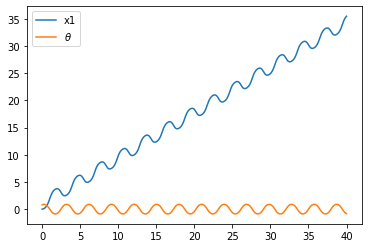

In [79]:
plt.plot(t, x1, label='x1')
plt.plot(t, the, label=r'$\theta$')
plt.legend()

In [80]:
def get_x1y1x2y2(t,x1,the,l):
    return (x1,
            x1*0,
            x1 + l*np.sin(the),
            -l*np.cos(the)
           )
x1, y1, x2, y2 = get_x1y1x2y2(t,x1,the,l)

In [81]:
y2

array([-2.12132034, -2.05936476, -2.00732668, ..., -2.14736941,
       -2.08185056, -2.02594371])

In [85]:
largo = (x2-x1)**2 + (y2-y1)**2
largo

array([9., 9., 9., ..., 9., 9., 9.])

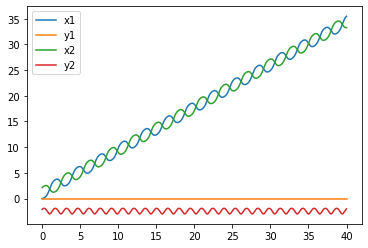

In [86]:
plt.plot(t,x1, label='x1')
plt.plot(t,y1, label='y1')
plt.plot(t,x2, label='x2')
plt.plot(t,y2, label='y2')
plt.legend()

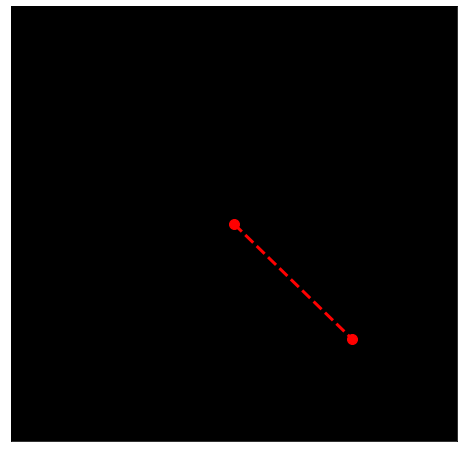

In [87]:
def animate(i):
    ln1.set_data([x1[i], x2[i]], [y1[i], y2[i]])
    return ln1,

fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # Esto es para esconder los ticks del eje x
ax.get_yaxis().set_ticks([])    # Esto es para esconder los ticks del eje y
ln1, = plt.plot([x1[0], x2[0]], [y1[0], y2[0]], 'r--o', lw = 3, markersize = 10)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames = 1000, interval = 50)
plt.show()
ani.save('pendulo.gif', writer = 'pillow', fps = 25)